In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [63]:
data = pd.read_csv('data/diabetes.csv')
print(data.shape)
data.head()

# Dataset from: https://www.kaggle.com/code/towfeeqf/diabetes-prediction-ml/data

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [64]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [65]:
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
forest_clf.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest_clf.score(X_test, y_test)))

Accuracy on training set: 0.981
Accuracy on test set: 0.740


### Including max_features paramter

In [66]:
forest_clf2 = RandomForestClassifier(n_estimators=24, max_features=5, random_state=42)
forest_clf2.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest_clf2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest_clf2.score(X_test, y_test)))

Accuracy on training set: 0.998
Accuracy on test set: 0.776


### Including max_depth parameter

In [67]:
forest_clf3 = RandomForestClassifier(n_estimators=24, max_features=5, max_depth=13, random_state=42)
forest_clf3.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest_clf3.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest_clf3.score(X_test, y_test)))

Accuracy on training set: 0.998
Accuracy on test set: 0.776


In [61]:
def plot_feature_importances(model):
    
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

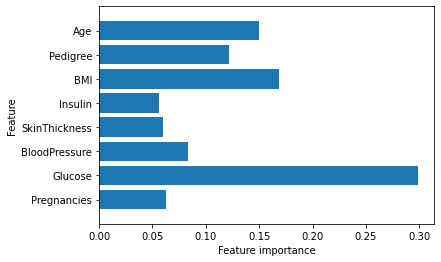

In [68]:
plot_feature_importances(forest_clf3)

# Feature importances is represented with a value between 0 and 1. 
# Where 0 means "not used at all", and 1 means "perfectly predits the target."

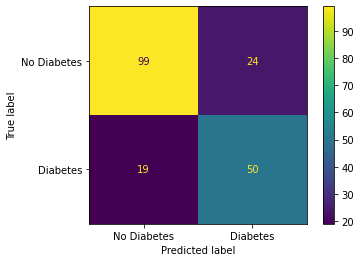

In [70]:
from sklearn.metrics import confusion_matrix # creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix

plot_confusion_matrix(forest_clf3, X_test, y_test, display_labels=["No Diabetes", "Diabetes"])